In [1]:
import pandas as pd
import numpy as np
import plotly
import stream

In [2]:
complete_data = pd.read_csv("../data/usa_incident_gas_distribution_jan2010_present - Copy.csv", encoding='latin')
complete_data


,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
0,7/27/2023,2023,20230039,38330,ORIGINAL FINAL,2596,COLUMBIA GAS OF OHIO INC,290 W NATIONWIDE BLVD,COLUMBUS,OH,...,1-614-460-5491,NaN,ROB R. SMITH,rrsmith@nisource.com,1-614-460-5491,ROB R. SMITH,MANAGER OF OPERATIONS COMPLIANCE- RISK MANAGEMENT,1-614-460-5491,rrsmith@nisource.com,"ON JUNE 26, 2023, A ROADWAY MILLING CONTRACTOR..."
1,7/20/2023,2023,20230036,38292,ORIGINAL,32074,SUMMIT NATURAL GAS OF MISSOURI,116 CHIEFS COURT,BRANSON,MO,...,417-349-0512,NaN,JORDAN SLAYTON,jslayton@summitnaturalgas.com,417-349-0512,MITCH PEBLEY,DIRECTOR OF OPERATIONS - MISSOURI,303-889-9455,mpebley@summitutilities.com,"ON JUNE 26TH, 2023, A&A CABLE WAS INSTALLING A..."
2,7/25/2023,2023,20230038,38316,ORIGINAL,12390,METROPOLITAN UTILITIES DISTRICT,7350 WORLD COMMUNICATIONS DR,OMAHA,NE,...,4025047108,NaN,NaN,NaN,NaN,TYSON ROBARDS,CLAIMS ADJUSTER,4025047108,tyson_robards@mudnebr.com,"FOLLOWING A SERVICE VALVE REPLACEMENT, ENVIRON..."
3,7/21/2023,2023,20230037,38299,ORIGINAL,13710,NORTHERN ILLINOIS GAS CO,"P.O. BOX 190, RT 59 & I-88",AURORA,IL,...,NaN,NaN,NaN,NaN,NaN,LETICIA QUEZADA,MANAGER COMPLIANCE AND QA,6305142036,lquezad@southernco.com,THE STRUCTURE WHERE THE EXPLOSION OCCURRED IS ...
4,7/14/2023,2023,20230035,38272,ORIGINAL FINAL,31348,ATMOS ENERGY CORPORATION - MID-TEX,5430 LBJ FREEWAY SUITE 1800,DALLAS,TX,...,469-261-2011,NaN,STEVE KLEIN,william.klein@atmosenergy.com,469-261-2011,JEFF KNIGHTS,SR. V.P. TECHNICAL SERVICES,214-206-2701,jeff.knights@atmosenergy.com,"ON JUNE 14, 2023, AT APPROXIMATELY 6:12 PM, AN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,11-04-2011,2010,20110378,15341,ORIGINAL,1640,BOSTON GAS CO,170 DATA DRIVE,WALTHAM,MA,...,7819071854,7819075701,NaN,NaN,NaN,CHRISTOPHER ARONSON,SENIOR COUNSEL,7819071854,christopher.aronson@us.ngrid.com,NaN
1389,3/31/2010,2010,20100013,15189,SUPPLEMENTAL FINAL,13710,NORTHERN ILLINOIS GAS CO,"P.O. BOX 190, RT 59 & I-88",AURORA,IL,...,630-388-2316,NaN,NaN,NaN,NaN,LETICIA QUEZADA,MANAGER REGULATORY COMPLIANCE,630-388-2316,lquezad@nicor.com,NATURAL GAS FROM CRACKED STEEL MAIN MIGRATED I...
1390,10/21/2010,2010,20100087,15877,SUPPLEMENTAL FINAL,11032,LACLEDE GAS CO,700 MARKET STREET,SAINT LOUIS,MO,...,3146585413,3145355075,NaN,NaN,NaN,CRAIG R HOEFERLIN,ASSISTANT VP ENGINEERING AND FIELD SERVICES,3146585410,choeferlin@lacledegas.com,A 2-INCH STEEL NATURAL GAS MAIN WAS EXPOSED IN...
1391,05-10-2010,2010,20100022,15025,ORIGINAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,6121 BOLLINGER CANYON RD.,SAN RAMON,CA,...,9259744313,NaN,NaN,NaN,NaN,LAURENCE DENISTON,PROGRAM MANAGER,9259744313,lcd1@pge.com,ON 1/19/10 AT APPROXIMATELY 1627 HOURS A 6.5 M...


In [3]:
complete_data.columns

Index(['REPORT_RECEIVED_DATE', 'IYEAR', 'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER',
       'REPORT_TYPE', 'OPERATOR_ID', 'NAME', 'OPERATOR_STREET_ADDRESS',
       'OPERATOR_CITY_NAME', 'OPERATOR_STATE_ABBREVIATION',
       ...
       'PREPARER_TELEPHONE', 'PREPARER_FAX', 'LOCAL_CONTACT_NAME',
       'LOCAL_CONTACT_EMAIL', 'LOCAL_CONTACT_TELEPHONE', 'AUTHORIZER_NAME',
       'AUTHORIZER_TITLE', 'AUTHORIZER_TELEPHONE', 'AUTHORIZER_EMAIL',
       'NARRATIVE'],
      dtype='object', length=466)

In [4]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Columns: 466 entries, REPORT_RECEIVED_DATE to NARRATIVE
dtypes: float64(124), int64(10), object(332)
memory usage: 5.0+ MB


In [5]:
complete_data['CAUSE'].value_counts()

CAUSE
EXCAVATION DAMAGE               463
OTHER OUTSIDE FORCE DAMAGE      430
OTHER INCIDENT CAUSE            113
NATURAL FORCE DAMAGE            100
INCORRECT OPERATION             100
PIPE, WELD, OR JOINT FAILURE     96
EQUIPMENT FAILURE                58
CORROSION FAILURE                33
Name: count, dtype: int64

<Axes: xlabel='CAUSE'>

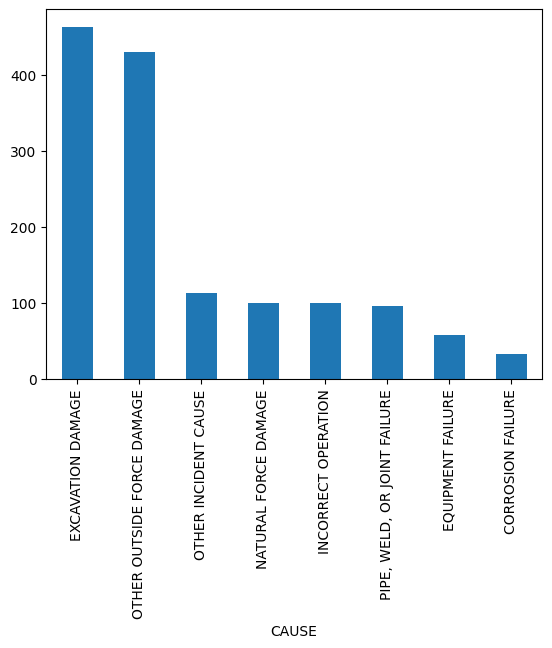

In [6]:
complete_data['CAUSE'].value_counts().plot.bar()

In [7]:
climate_data= complete_data[complete_data['CAUSE']=='NATURAL FORCE DAMAGE']
climate_data

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
16,05-04-2023,2023,20230025,38039,SUPPLEMENTAL FINAL,31044,"LOWER VALLEY ENERGY, INC.",236 N. WASHINGTON BLVD/P.O. BOX 188,AFTON,WY,...,307 885 6151,307 885 5787,NaN,NaN,NaN,CRAIG COLES,DIRECTOR OF GAS OPERATIONS,307 885 6151,ccoles@lvenergy.com,ON MARCH 25TH 2023 LOWER VALLEY ENERGY WAS CAL...
19,04-10-2023,2023,20230018,37922,ORIGINAL,31632,NORTHWESTERN CORPORATION,3010 W. 69TH ST.,SIOUX FALLS,SD,...,605-353-7462,605-353-7519,MELISSA BARUTH,melissa.baruth@northwestern.com,605-353-7462,MELISSA BARUTH,DOT SUPERVISOR,605-353-7462,melissa.baruth@northwestern.com,"NARRATIVE 6619 WENTWORTH PARK DRIVE, WENTWORTH..."
23,3/24/2023,2023,20230015,37871,ORIGINAL,31632,NORTHWESTERN CORPORATION,3010 W. 69TH ST.,SIOUX FALLS,SD,...,6053537462,NaN,MELISSA BARUTH,melissa.baruth@northwestern.com,6053537462,MELISSA BARUTH,DOT SUPERVISOR,6053537462,melissa.baruth@northwestern.com,2/23/2023 AT ABOUT 11:22 AM 911 NOTIFIED ALL V...
30,02-01-2023,2023,20230006,37843,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,6121 BOLLINGER CANYON RD.,SAN RAMON,CA,...,510/298-7063,NaN,NaN,NaN,NaN,SUSIE RICHMOND,GAS REGULATORY COMPLIANCE MANAGER,925/786-0267,gsr8,"ON JANUARY 6, 2023, AT 09:50, PG&E INCIDENT ON..."
73,4/25/2022,2022,20220033,36728,SUPPLEMENTAL FINAL,4499,CENTERPOINT ENERGY RESOURCES CORPORATION,1111 LOUISIANA ST,HOUSTON,TX,...,713-967-9325,NaN,JASON SURRATT,jason.surratt@centerpointenergy.com,7775006234,RANDALL SANDERS,DIRECTOR OF OPERATIONS TX. REGION,713-207-5708,randall.x.sanders@centerpointenergy.com,DURING A LOCAL THUNDER STORM A PONTOON BOAT ON...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,3/25/2010,2010,20100008,15008,ORIGINAL FINAL,8040,AMERENIP,500 SOUTH 27TH STREET,DECATUR,IL,...,217-625-6804,217-625-6803,NaN,NaN,NaN,JEROME THEMIG,MANAGER OF GAS COMPLIANCE,217-625-6804,jthemig@ameren.com,AMERENIP RECEIVED A CALL FROM AN OCCUPANT AT A...
1370,3/15/2010,2010,20100003,15023,SUPPLEMENTAL FINAL,31840,UNISOURCE ENERGY SERVICES,2901 W. SHAMRELL BLVD.,FLAGSTAFF,AZ,...,928 532-3801,928 537-3994,NaN,NaN,NaN,ROBERT ADAMS,SHOW LOW DISTRICT MANAGER,928 532-3801,radams@uesaz.com,ON 2/22/10 PINETOP FIRE DEPARTMENT RESPONDED T...
1384,11-04-2011,2010,20110379,15342,ORIGINAL FINAL,1640,BOSTON GAS CO,170 DATA DRIVE,WALTHAM,MA,...,7819071854,7819075701,NaN,NaN,NaN,CHRISTOPHER S ARONSON,SENIOR COUNSEL,7819071854,christopher.aronson@us.ngrid.com,NaN
1387,3/31/2010,2010,20100012,15012,ORIGINAL,15952,PUBLIC SERVICE ELECTRIC & GAS CO,80 PARK PLAZA M/C - T18,NEWARK,NJ,...,9734307986,9736241937,NaN,NaN,NaN,MICHAEL SCHMID,SOUTHERN DIVISION MANAGER,6092392470,michael.schmid@pseg.com,AT APPROXIMATELY 3:05AM PUBLIC SERVICE ELECTRI...


In [8]:
climate_data['CAUSE_DETAILS'].value_counts()

CAUSE_DETAILS
LIGHTNING                                        29
HEAVY RAINS/FLOODS                               19
TEMPERATURE                                      16
OTHER NATURAL FORCE DAMAGE                       13
EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS    11
HIGH WINDS                                        6
SNOW/ICE IMPACT OR ACCUMULATION                   5
TREES/VEGETATION ROOTS                            1
Name: count, dtype: int64

<Axes: xlabel='CAUSE_DETAILS'>

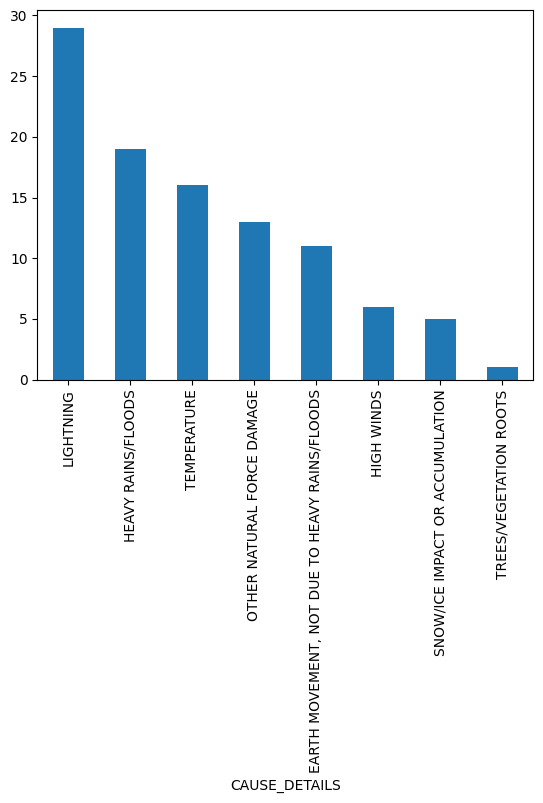

In [9]:
climate_data['CAUSE_DETAILS'].value_counts().plot.bar()

In [10]:
climate_data.isna()

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
16,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1370,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1384,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,True
1387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False


In [11]:
climate_data_non_null =climate_data.dropna(how='all').dropna(how='all', axis=1)
climate_data_non_null

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
16,05-04-2023,2023,20230025,38039,SUPPLEMENTAL FINAL,31044,"LOWER VALLEY ENERGY, INC.",236 N. WASHINGTON BLVD/P.O. BOX 188,AFTON,WY,...,307 885 6151,307 885 5787,NaN,NaN,NaN,CRAIG COLES,DIRECTOR OF GAS OPERATIONS,307 885 6151,ccoles@lvenergy.com,ON MARCH 25TH 2023 LOWER VALLEY ENERGY WAS CAL...
19,04-10-2023,2023,20230018,37922,ORIGINAL,31632,NORTHWESTERN CORPORATION,3010 W. 69TH ST.,SIOUX FALLS,SD,...,605-353-7462,605-353-7519,MELISSA BARUTH,melissa.baruth@northwestern.com,605-353-7462,MELISSA BARUTH,DOT SUPERVISOR,605-353-7462,melissa.baruth@northwestern.com,"NARRATIVE 6619 WENTWORTH PARK DRIVE, WENTWORTH..."
23,3/24/2023,2023,20230015,37871,ORIGINAL,31632,NORTHWESTERN CORPORATION,3010 W. 69TH ST.,SIOUX FALLS,SD,...,6053537462,NaN,MELISSA BARUTH,melissa.baruth@northwestern.com,6053537462,MELISSA BARUTH,DOT SUPERVISOR,6053537462,melissa.baruth@northwestern.com,2/23/2023 AT ABOUT 11:22 AM 911 NOTIFIED ALL V...
30,02-01-2023,2023,20230006,37843,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,6121 BOLLINGER CANYON RD.,SAN RAMON,CA,...,510/298-7063,NaN,NaN,NaN,NaN,SUSIE RICHMOND,GAS REGULATORY COMPLIANCE MANAGER,925/786-0267,gsr8,"ON JANUARY 6, 2023, AT 09:50, PG&E INCIDENT ON..."
73,4/25/2022,2022,20220033,36728,SUPPLEMENTAL FINAL,4499,CENTERPOINT ENERGY RESOURCES CORPORATION,1111 LOUISIANA ST,HOUSTON,TX,...,713-967-9325,NaN,JASON SURRATT,jason.surratt@centerpointenergy.com,7775006234,RANDALL SANDERS,DIRECTOR OF OPERATIONS TX. REGION,713-207-5708,randall.x.sanders@centerpointenergy.com,DURING A LOCAL THUNDER STORM A PONTOON BOAT ON...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,3/25/2010,2010,20100008,15008,ORIGINAL FINAL,8040,AMERENIP,500 SOUTH 27TH STREET,DECATUR,IL,...,217-625-6804,217-625-6803,NaN,NaN,NaN,JEROME THEMIG,MANAGER OF GAS COMPLIANCE,217-625-6804,jthemig@ameren.com,AMERENIP RECEIVED A CALL FROM AN OCCUPANT AT A...
1370,3/15/2010,2010,20100003,15023,SUPPLEMENTAL FINAL,31840,UNISOURCE ENERGY SERVICES,2901 W. SHAMRELL BLVD.,FLAGSTAFF,AZ,...,928 532-3801,928 537-3994,NaN,NaN,NaN,ROBERT ADAMS,SHOW LOW DISTRICT MANAGER,928 532-3801,radams@uesaz.com,ON 2/22/10 PINETOP FIRE DEPARTMENT RESPONDED T...
1384,11-04-2011,2010,20110379,15342,ORIGINAL FINAL,1640,BOSTON GAS CO,170 DATA DRIVE,WALTHAM,MA,...,7819071854,7819075701,NaN,NaN,NaN,CHRISTOPHER S ARONSON,SENIOR COUNSEL,7819071854,christopher.aronson@us.ngrid.com,NaN
1387,3/31/2010,2010,20100012,15012,ORIGINAL,15952,PUBLIC SERVICE ELECTRIC & GAS CO,80 PARK PLAZA M/C - T18,NEWARK,NJ,...,9734307986,9736241937,NaN,NaN,NaN,MICHAEL SCHMID,SOUTHERN DIVISION MANAGER,6092392470,michael.schmid@pseg.com,AT APPROXIMATELY 3:05AM PUBLIC SERVICE ELECTRI...


In [12]:
climate_data_non_null.to_csv('climate_data_non_null.csv')

In [13]:
climate_data_non_null_updated = pd.read_csv('../data/climate_data_non_null.csv', encoding='latin')

In [14]:
climate_data_non_null_updated

,REPORT_RECEIVED_DATE,IYEAR,LOCAL_DATETIME,LOCATION_LATITUDE,LOCATION_LONGITUDE,FLOW_CONT_KEY_CRIT_IND,FLOW_CONT_SERVICE_VALVE_IND,FLOW_CONT_METER_REG_IND,FLOW_CONT_SQUEEZE_OFF_IND,FLOW_CONT_STOPPLE_FITNG_IND,...,NF_OTHER_DETAILS,NF_EXTREME_WEATHER_IND,NF_HURRICANE_IND,NF_TROPICAL_STORM_IND,NF_TORNADO_IND,NF_OTHER_IND,NF_EXTREME_WEATHER_DETAILS,NF_HEAVY_RAINS_IND,NF_HIGH_WINDS_IND,NF_VEGITATION_ROOT_IND
0,05-04-2023,2023,3/25/2023 2:56,43.469763,-110.748873,NaN,NaN,YES,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04-10-2023,2023,03-11-2023 19:20,43.956200,-96.999100,NaN,NaN,YES,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/24/2023,2023,2/23/2023 11:22,44.017166,-97.097857,NaN,NaN,NaN,YES,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02-01-2023,2023,01-05-2023 06:22,37.965508,-122.334511,NaN,NaN,NaN,YES,NaN,...,NaN,YES,NaN,NaN,NaN,YES,HEAVY RAIN (BOMB CYCLONE + ATMOSPHERIC RIVER),NaN,NaN,NaN
4,4/25/2022,2022,04-05-2022 01:55,32.298620,-95.266160,NaN,NaN,YES,NaN,NaN,...,NaN,YES,NaN,NaN,NaN,YES,THUNDER STORMS/HIGH WINDS,YES,YES,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3/25/2010,2010,2/26/2010 14:17,41.235090,-89.930110,NaN,NaN,NaN,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,3/15/2010,2010,2/22/2010 20:57,34.109340,-109.860100,NaN,NaN,NaN,NaN,NaN,...,SNOW ACCUMULATION ON THE METER SET ASSEMBLY,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,11-04-2011,2010,1/25/2010 18:06,42.526781,-71.094024,NaN,NaN,NaN,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,3/31/2010,2010,1/18/2010 4:38,40.511140,-74.408060,NaN,NaN,NaN,NaN,NaN,...,UNKNOWN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
climate_data_non_null_updated.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 146 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    REPORT_RECEIVED_DATE            100 non-null    object 
 1    IYEAR                           100 non-null    int64  
 2    LOCAL_DATETIME                  100 non-null    object 
 3    LOCATION_LATITUDE               100 non-null    float64
 4    LOCATION_LONGITUDE              100 non-null    float64
 5    FLOW_CONT_KEY_CRIT_IND          2 non-null      object 
 6    FLOW_CONT_SERVICE_VALVE_IND     1 non-null      object 
 7    FLOW_CONT_METER_REG_IND         7 non-null      object 
 8    FLOW_CONT_SQUEEZE_OFF_IND       3 non-null      object 
 9    FLOW_CONT_STOPPLE_FITNG_IND     2 non-null      object 
 10   FLOW_CONT_OTHER_IND             1 non-null      object 
 11   FLOW_CONT_OTHER_DETAIL          1 non-null      object 
 12   NRC_RPT_DATETIME     

#### Removing more null values columns

In [53]:
df = climate_data_non_null_updated.copy()
df.shape

(100, 146)

In [54]:
drop_column_list = []
for i in range(0, df.shape[1]):
#     print(i)
    column = df.iloc[:,i]
    if column.isna().value_counts()[0]==100:
#         print(f"i value = {i}, {column.name} and count is {column.isna().value_counts()[0]}")
        continue
    elif column.isna().value_counts()[1]< 70:
#         print(f"Drop - i value = {i}, {column.name} and count is {column.isna().value_counts()[0]}")
        drop_column_list.append(column.name)
#         df.drop(column.name, axis='columns', inplace=True)
    

In [55]:
# drop_column_list

In [56]:
for col in drop_column_list:
#     print(col)
    df.drop(col,axis=1, inplace=True)

In [74]:
df['IYEAR'] = pd.to_datetime(df['IYEAR'])
df['REPORT_RECEIVED_DATE']= pd.to_datetime(df['REPORT_RECEIVED_DATE'], format='mixed')
df['LOCAL_DATETIME'] = pd.to_datetime(df['LOCAL_DATETIME'], format='mixed')

In [75]:
df.info(verbose=True, show_counts=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REPORT_RECEIVED_DATE      100 non-null    datetime64[ns]
 1   IYEAR                     100 non-null    datetime64[ns]
 2   LOCAL_DATETIME            100 non-null    datetime64[ns]
 3   LOCATION_LATITUDE         100 non-null    float64       
 4   LOCATION_LONGITUDE        100 non-null    float64       
 5   FATALITY_IND              100 non-null    object        
 6   FATAL                     100 non-null    int64         
 7   INJURY_IND                100 non-null    object        
 8   INJURE                    100 non-null    int64         
 9   IGNITE_IND                100 non-null    object        
 10  FEDERAL                   100 non-null    object        
 11  LOCATION_TYPE             100 non-null    object        
 12  INCIDENT_AREA_TYPE     

In [76]:
df.describe()

,REPORT_RECEIVED_DATE,IYEAR,LOCAL_DATETIME,LOCATION_LATITUDE,LOCATION_LONGITUDE,FATAL,INJURE,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,PRPTY,COMMERCIAL_AFFECTED,INDUSTRIAL_AFFECTED,RESIDENCES_AFFECTED,ACCIDENT_PSIG,NORMAL_PSIG,MOP_PSIG
count,100,100,100,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2016-03-01 21:21:36,1970-01-01 00:00:00.000002015,2016-01-11 11:56:38.399999744,40.671676,-91.590755,0.170000,0.640000,2.664959e+05,6.752443e+04,5.526128e+05,4.960000,0.120000,100.390000,53.868100,53.728800,76.901300
min,2010-03-15 00:00:00,1970-01-01 00:00:00.000002010,2010-01-09 16:27:00,30.337500,-151.320649,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013-01-02 06:00:00,1970-01-01 00:00:00.000002012,2012-12-08 00:17:30,38.386770,-96.732606,0.000000,0.000000,3.000000e+02,5.000000e+02,5.213100e+04,0.000000,0.000000,1.000000,14.750000,18.000000,25.000000
50%,2015-07-24 12:00:00,1970-01-01 00:00:00.000002015,2015-06-25 15:00:00,40.786463,-91.643291,0.000000,0.000000,2.500000e+03,2.000000e+03,1.060350e+05,0.000000,0.000000,1.000000,41.500000,44.500000,55.000000
75%,2019-07-13 18:00:00,1970-01-01 00:00:00.000002019,2019-04-20 21:59:45,43.553762,-80.825321,0.000000,0.000000,2.509325e+04,7.085500e+03,3.831685e+05,0.000000,0.000000,13.250000,55.000000,55.000000,60.000000
max,2023-05-04 00:00:00,1970-01-01 00:00:00.000002023,2023-03-25 02:56:00,60.576341,-71.094024,8.000000,48.000000,1.540000e+07,2.670000e+06,1.540000e+07,169.000000,8.000000,2584.000000,631.000000,555.000000,850.000000
std,NaN,NaN,NaN,4.450906,15.456594,0.954045,4.806393,1.622794e+06,3.436662e+05,1.735689e+06,19.772402,0.832181,351.304837,90.270424,79.820541,144.131846


In [77]:
# df['IYEAR'] = pd.to_datetime(df['IYEAR'])
# df['REPORT_RECEIVED_DATE']= pd.to_datetime(df['REPORT_RECEIVED_DATE'], format='mixed')
# df['LOCAL_DATETIME'] = pd.to_datetime(df['LOCAL_DATETIME'], format='mixed')

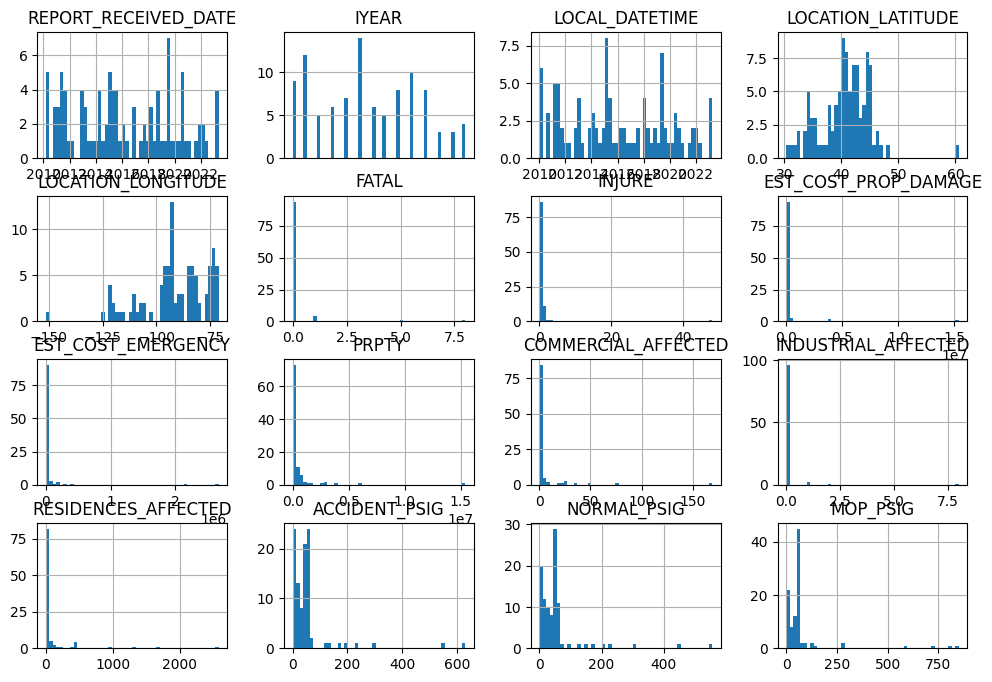

In [78]:
# Visualize the data 

df.hist(bins=50, figsize=(12,8));

In [79]:
### Create a test dataset

def shuffle_and_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [80]:
train_set, test_set = shuffle_and_split(df, 0.2)

In [81]:
len(train_set)

80

In [82]:
len(test_set)

20

<Axes: xlabel='LOCATION_LONGITUDE', ylabel='LOCATION_LATITUDE'>

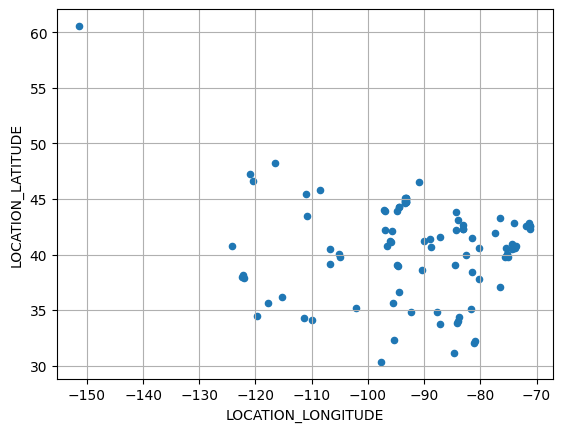

In [83]:
df.plot(kind='scatter', 
                 x = "LOCATION_LONGITUDE", 
                 y = "LOCATION_LATITUDE", 
                 grid=True)


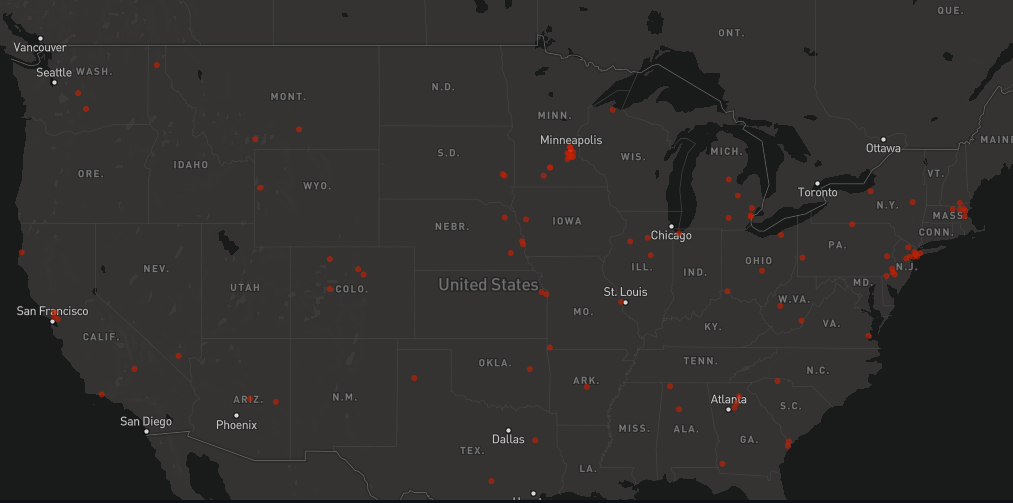

In [84]:
# to seprate the numerical columns
df_num = df.select_dtypes(include = [np.number])
df_num

,LOCATION_LATITUDE,LOCATION_LONGITUDE,FATAL,INJURE,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,PRPTY,COMMERCIAL_AFFECTED,INDUSTRIAL_AFFECTED,RESIDENCES_AFFECTED,ACCIDENT_PSIG,NORMAL_PSIG,MOP_PSIG
0,43.469763,-110.748873,0,0,100,540,3001369,0,0,1,50.0,50.0,60.0
1,43.956200,-96.999100,0,0,1000,5000,609908,0,0,1,40.0,40.0,66.0
2,44.017166,-97.097857,0,0,1000,5000,406054,0,0,1,40.0,40.0,50.0
3,37.965508,-122.334511,0,0,13571,596,46315,0,0,8,54.0,54.0,60.0
4,32.298620,-95.266160,0,0,300,676,125981,1,0,0,50.0,50.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41.235090,-89.930110,0,0,550,315,865,6,0,0,9.0,1.0,2.0
96,34.109340,-109.860100,0,0,153,2420,2648,0,0,1,50.0,55.0,60.0
97,42.526781,-71.094024,0,1,0,0,250000,0,0,4,1.8,1.8,2.0
98,40.511140,-74.408060,0,0,2390,44966,506531,0,0,1,32.0,32.0,35.0


In [85]:
# Scikit-Learn class SimpleImputer

from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')

In [86]:
impute.fit(df_num) # training

SimpleImputer(strategy='median')

In [87]:
impute.statistics_

array([ 4.0786463e+01, -9.1643291e+01,  0.0000000e+00,  0.0000000e+00,
        2.5000000e+03,  2.0000000e+03,  1.0603500e+05,  0.0000000e+00,
        0.0000000e+00,  1.0000000e+00,  4.1500000e+01,  4.4500000e+01,
        5.5000000e+01])

In [88]:
df_num.median().values

array([ 4.0786463e+01, -9.1643291e+01,  0.0000000e+00,  0.0000000e+00,
        2.5000000e+03,  2.0000000e+03,  1.0603500e+05,  0.0000000e+00,
        0.0000000e+00,  1.0000000e+00,  4.1500000e+01,  4.4500000e+01,
        5.5000000e+01])

In [89]:
X = impute.transform(df_num)
X

array([[  43.469763 , -110.748873 ,    0.       , ...,   50.       ,
          50.       ,   60.       ],
       [  43.9562   ,  -96.9991   ,    0.       , ...,   40.       ,
          40.       ,   66.       ],
       [  44.017166 ,  -97.097857 ,    0.       , ...,   40.       ,
          40.       ,   50.       ],
       ...,
       [  42.5267815,  -71.0940244,    0.       , ...,    1.8      ,
           1.8      ,    2.       ],
       [  40.51114  ,  -74.40806  ,    0.       , ...,   32.       ,
          32.       ,   35.       ],
       [  40.7732   , -124.1528   ,    0.       , ...,   45.       ,
          45.       ,   50.       ]])

In [90]:
df_tr = pd.DataFrame(X, columns=df_num.columns, 
                          index = df_num.index)
df_tr

,LOCATION_LATITUDE,LOCATION_LONGITUDE,FATAL,INJURE,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,PRPTY,COMMERCIAL_AFFECTED,INDUSTRIAL_AFFECTED,RESIDENCES_AFFECTED,ACCIDENT_PSIG,NORMAL_PSIG,MOP_PSIG
0,43.469763,-110.748873,0.0,0.0,100.0,540.0,3001369.0,0.0,0.0,1.0,50.0,50.0,60.0
1,43.956200,-96.999100,0.0,0.0,1000.0,5000.0,609908.0,0.0,0.0,1.0,40.0,40.0,66.0
2,44.017166,-97.097857,0.0,0.0,1000.0,5000.0,406054.0,0.0,0.0,1.0,40.0,40.0,50.0
3,37.965508,-122.334511,0.0,0.0,13571.0,596.0,46315.0,0.0,0.0,8.0,54.0,54.0,60.0
4,32.298620,-95.266160,0.0,0.0,300.0,676.0,125981.0,1.0,0.0,0.0,50.0,50.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41.235090,-89.930110,0.0,0.0,550.0,315.0,865.0,6.0,0.0,0.0,9.0,1.0,2.0
96,34.109340,-109.860100,0.0,0.0,153.0,2420.0,2648.0,0.0,0.0,1.0,50.0,55.0,60.0
97,42.526781,-71.094024,0.0,1.0,0.0,0.0,250000.0,0.0,0.0,4.0,1.8,1.8,2.0
98,40.511140,-74.408060,0.0,0.0,2390.0,44966.0,506531.0,0.0,0.0,1.0,32.0,32.0,35.0


In [91]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOCATION_LATITUDE     100 non-null    float64
 1   LOCATION_LONGITUDE    100 non-null    float64
 2   FATAL                 100 non-null    float64
 3   INJURE                100 non-null    float64
 4   EST_COST_PROP_DAMAGE  100 non-null    float64
 5   EST_COST_EMERGENCY    100 non-null    float64
 6   PRPTY                 100 non-null    float64
 7   COMMERCIAL_AFFECTED   100 non-null    float64
 8   INDUSTRIAL_AFFECTED   100 non-null    float64
 9   RESIDENCES_AFFECTED   100 non-null    float64
 10  ACCIDENT_PSIG         100 non-null    float64
 11  NORMAL_PSIG           100 non-null    float64
 12  MOP_PSIG              100 non-null    float64
dtypes: float64(13)
memory usage: 10.3 KB


,LOCATION_LATITUDE,LOCATION_LONGITUDE,FATAL,INJURE,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,PRPTY,COMMERCIAL_AFFECTED,INDUSTRIAL_AFFECTED,RESIDENCES_AFFECTED,ACCIDENT_PSIG,NORMAL_PSIG,MOP_PSIG
LOCATION_LATITUDE,1.000000,-0.182545,-0.039164,-0.008581,-0.072182,-0.172618,-0.065544,-0.105632,0.030176,-0.114456,-0.230351,-0.220645,-0.183440
LOCATION_LONGITUDE,-0.182545,1.000000,0.161332,0.126076,-0.207113,-0.221940,-0.245959,0.014760,0.000159,-0.143742,-0.084333,-0.075848,-0.052792
FATAL,-0.039164,0.161332,1.000000,0.863765,-0.014588,0.020647,0.142319,-0.022126,-0.025954,-0.022351,-0.096546,-0.108579,-0.085308
INJURE,-0.008581,0.126076,0.863765,1.000000,-0.005848,0.033767,0.139076,-0.012270,-0.019395,-0.009069,-0.075654,-0.085253,-0.067849
EST_COST_PROP_DAMAGE,-0.072182,-0.207113,-0.014588,-0.005848,1.000000,0.122321,0.944459,0.047593,-0.017793,0.042238,-0.055304,-0.062454,-0.052746
EST_COST_EMERGENCY,-0.172618,-0.221940,0.020647,0.033767,0.122321,1.000000,0.308659,0.012084,-0.020736,0.026405,-0.015469,-0.014450,-0.032982
PRPTY,-0.065544,-0.245959,0.142319,0.139076,0.944459,0.308659,1.000000,0.020155,-0.039038,0.019692,-0.086057,-0.094643,-0.088850
COMMERCIAL_AFFECTED,-0.105632,0.014760,-0.022126,-0.012270,0.047593,0.012084,0.020155,1.000000,0.128597,0.526232,-0.059727,-0.064202,-0.069435
INDUSTRIAL_AFFECTED,0.030176,0.000159,-0.025954,-0.019395,-0.017793,-0.020736,-0.039038,0.128597,1.000000,0.037257,-0.041067,-0.032656,-0.040155
RESIDENCES_AFFECTED,-0.114456,-0.143742,-0.022351,-0.009069,0.042238,0.026405,0.019692,0.526232,0.037257,1.000000,-0.036375,-0.027118,-0.051340


### Check Correlation

In [93]:
df_tr.corr()

,LOCATION_LATITUDE,LOCATION_LONGITUDE,FATAL,INJURE,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,PRPTY,COMMERCIAL_AFFECTED,INDUSTRIAL_AFFECTED,RESIDENCES_AFFECTED,ACCIDENT_PSIG,NORMAL_PSIG,MOP_PSIG
LOCATION_LATITUDE,1.000000,-0.182545,-0.039164,-0.008581,-0.072182,-0.172618,-0.065544,-0.105632,0.030176,-0.114456,-0.230351,-0.220645,-0.183440
LOCATION_LONGITUDE,-0.182545,1.000000,0.161332,0.126076,-0.207113,-0.221940,-0.245959,0.014760,0.000159,-0.143742,-0.084333,-0.075848,-0.052792
FATAL,-0.039164,0.161332,1.000000,0.863765,-0.014588,0.020647,0.142319,-0.022126,-0.025954,-0.022351,-0.096546,-0.108579,-0.085308
INJURE,-0.008581,0.126076,0.863765,1.000000,-0.005848,0.033767,0.139076,-0.012270,-0.019395,-0.009069,-0.075654,-0.085253,-0.067849
EST_COST_PROP_DAMAGE,-0.072182,-0.207113,-0.014588,-0.005848,1.000000,0.122321,0.944459,0.047593,-0.017793,0.042238,-0.055304,-0.062454,-0.052746
EST_COST_EMERGENCY,-0.172618,-0.221940,0.020647,0.033767,0.122321,1.000000,0.308659,0.012084,-0.020736,0.026405,-0.015469,-0.014450,-0.032982
PRPTY,-0.065544,-0.245959,0.142319,0.139076,0.944459,0.308659,1.000000,0.020155,-0.039038,0.019692,-0.086057,-0.094643,-0.088850
COMMERCIAL_AFFECTED,-0.105632,0.014760,-0.022126,-0.012270,0.047593,0.012084,0.020155,1.000000,0.128597,0.526232,-0.059727,-0.064202,-0.069435
INDUSTRIAL_AFFECTED,0.030176,0.000159,-0.025954,-0.019395,-0.017793,-0.020736,-0.039038,0.128597,1.000000,0.037257,-0.041067,-0.032656,-0.040155
RESIDENCES_AFFECTED,-0.114456,-0.143742,-0.022351,-0.009069,0.042238,0.026405,0.019692,0.526232,0.037257,1.000000,-0.036375,-0.027118,-0.051340


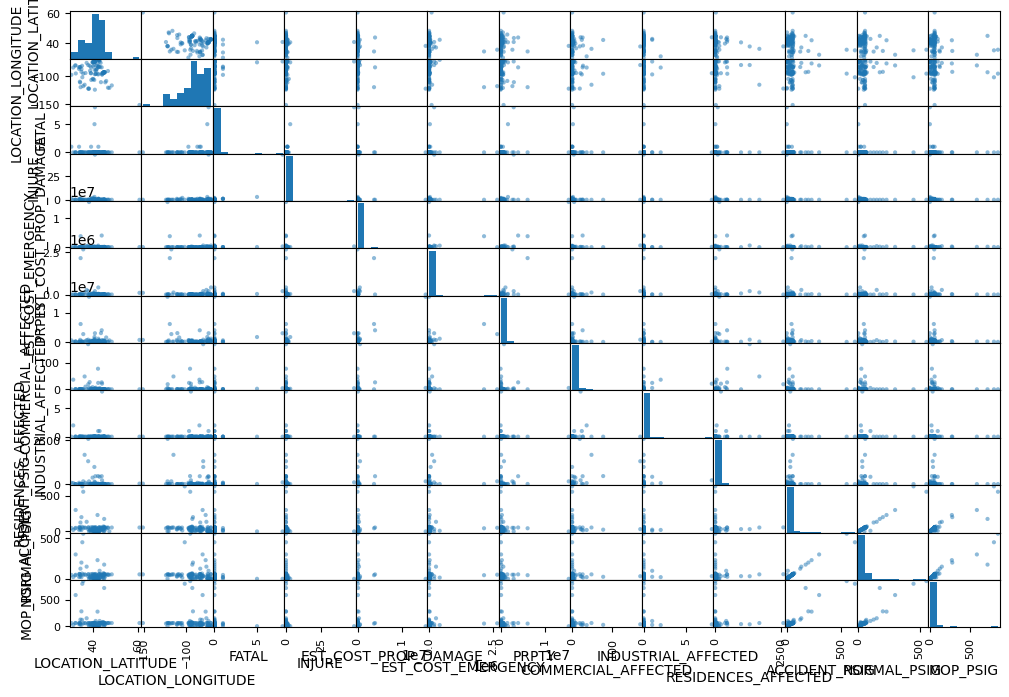

In [96]:
pd.plotting.scatter_matrix(df_tr, figsize=(12,8));

In [98]:
df_tr.columns

Index(['LOCATION_LATITUDE', 'LOCATION_LONGITUDE', 'FATAL', 'INJURE',
       'EST_COST_PROP_DAMAGE', 'EST_COST_EMERGENCY', 'PRPTY',
       'COMMERCIAL_AFFECTED', 'INDUSTRIAL_AFFECTED', 'RESIDENCES_AFFECTED',
       'ACCIDENT_PSIG', 'NORMAL_PSIG', 'MOP_PSIG'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REPORT_RECEIVED_DATE      100 non-null    datetime64[ns]
 1   IYEAR                     100 non-null    datetime64[ns]
 2   LOCAL_DATETIME            100 non-null    datetime64[ns]
 3   LOCATION_LATITUDE         100 non-null    float64       
 4   LOCATION_LONGITUDE        100 non-null    float64       
 5   FATALITY_IND              100 non-null    object        
 6   FATAL                     100 non-null    int64         
 7   INJURY_IND                100 non-null    object        
 8   INJURE                    100 non-null    int64         
 9   IGNITE_IND                100 non-null    object        
 10  FEDERAL                   100 non-null    object        
 11  LOCATION_TYPE             100 non-null    object        
 12  INCIDENT_AREA_TYPE     

In [105]:
df_cat = df.select_dtypes(include = 'object')
df_cat

,FATALITY_IND,INJURY_IND,IGNITE_IND,FEDERAL,LOCATION_TYPE,INCIDENT_AREA_TYPE,INCIDENT_AREA_SUBTYPE,CROSSING,PIPE_FACILITY_TYPE,SYSTEM_PART_INVOLVED,...,CLASS_LOCATION_TYPE,ACCIDENT_PRESSURE,SCADA_IN_PLACE_IND,ACCIDENT_IDENTIFIER,EMPLOYEE_DRUG_TEST_IND,CONTRACTOR_DRUG_TEST_IND,CAUSE,CAUSE_DETAILS,NATURAL_FORCE_TYPE,NF_EXTREME_WEATHER_IND
0,NO,NO,YES,NO,PRIVATE PROPERTY,ABOVEGROUND,TYPICAL ABOVEGROUND FACILITY PIPING OR APPURTE...,NO,COOPERATIVE,SERVICE RISER,...,CLASS 2 LOCATION,PRESSURE DID NOT EXCEED MAOP,NO,NOTIFICATION FROM EMERGENCY RESPONDER,NO,NO,NATURAL FORCE DAMAGE,SNOW/ICE IMPACT OR ACCUMULATION,SNOW/ICE IMPACT OR ACCUMULATION,NO
1,NO,NO,NO,NO,PRIVATE PROPERTY,ABOVEGROUND,TYPICAL ABOVEGROUND FACILITY PIPING OR APPURTE...,NO,INVESTOR OWNED,OUTSIDE METER/REGULATOR SET,...,CLASS 3 LOCATION,PRESSURE DID NOT EXCEED MAOP,NO,NOTIFICATION FROM EMERGENCY RESPONDER,NO,NO,NATURAL FORCE DAMAGE,SNOW/ICE IMPACT OR ACCUMULATION,SNOW/ICE IMPACT OR ACCUMULATION,NO
2,NO,NO,YES,NO,PRIVATE PROPERTY,ABOVEGROUND,TYPICAL ABOVEGROUND FACILITY PIPING OR APPURTE...,NO,INVESTOR OWNED,OUTSIDE METER/REGULATOR SET,...,CLASS 3 LOCATION,PRESSURE DID NOT EXCEED MAOP,NO,NOTIFICATION FROM EMERGENCY RESPONDER,NO,NO,NATURAL FORCE DAMAGE,SNOW/ICE IMPACT OR ACCUMULATION,SNOW/ICE IMPACT OR ACCUMULATION,NO
3,NO,NO,NO,NO,PUBLIC PROPERTY,UNDERGROUND,UNDER PAVEMENT,NO,PRIVATELY OWNED,MAIN,...,CLASS 3 LOCATION,PRESSURE DID NOT EXCEED MAOP,NO,NOTIFICATION FROM EMERGENCY RESPONDER,NO,NO,NATURAL FORCE DAMAGE,HEAVY RAINS/FLOODS,HEAVY RAINS/FLOODS,YES
4,NO,NO,YES,NO,PRIVATE PROPERTY,ABOVEGROUND,TYPICAL ABOVEGROUND FACILITY PIPING OR APPURTE...,NO,PRIVATELY OWNED,OUTSIDE METER/REGULATOR SET,...,CLASS 3 LOCATION,PRESSURE DID NOT EXCEED MAOP,NO,NOTIFICATION FROM EMERGENCY RESPONDER,NO,NO,NATURAL FORCE DAMAGE,HIGH WINDS,HIGH WINDS,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NO,NO,YES,NO,PRIVATE PROPERTY,ABOVEGROUND,TYPICAL ABOVEGROUND FACILITY PIPING OR APPURTE...,NO,PRIVATELY OWNED,OUTSIDE METER/REGULATOR SET,...,CLASS 3 LOCATION,PRESSURE EXCEEDED THE APPLICABLE ALLOWANCE IN ...,NO,NOTIFICATION FROM PUBLIC,NO,NO,NATURAL FORCE DAMAGE,TEMPERATURE,TEMPERATURE,NO
96,NO,NO,YES,NO,PRIVATE PROPERTY,ABOVEGROUND,TYPICAL ABOVEGROUND FACILITY PIPING OR APPURTE...,NO,PRIVATELY OWNED,SERVICE RISER,...,CLASS 3 LOCATION,PRESSURE DID NOT EXCEED MAOP,NO,NOTIFICATION FROM EMERGENCY RESPONDER,NO,NO,NATURAL FORCE DAMAGE,OTHER NATURAL FORCE DAMAGE,OTHER NATURAL FORCE DAMAGE,NO
97,NO,YES,YES,NO,PRIVATE PROPERTY,UNDERGROUND,UNDER SOIL,NO,PRIVATELY OWNED,MAIN,...,CLASS 3 LOCATION,PRESSURE DID NOT EXCEED MAOP,YES,NOTIFICATION FROM EMERGENCY RESPONDER,NO,NO,NATURAL FORCE DAMAGE,TEMPERATURE,TEMPERATURE,NO
98,NO,NO,YES,NO,PRIVATE PROPERTY,ABOVEGROUND,INSIDE A BUILDING,NO,PRIVATELY OWNED,MAIN,...,CLASS 4 LOCATION,PRESSURE DID NOT EXCEED MAOP,NO,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",YES,NO,NATURAL FORCE DAMAGE,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS","EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",NO


In [106]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FATALITY_IND              100 non-null    object
 1   INJURY_IND                100 non-null    object
 2   IGNITE_IND                100 non-null    object
 3   FEDERAL                   100 non-null    object
 4   LOCATION_TYPE             100 non-null    object
 5   INCIDENT_AREA_TYPE        100 non-null    object
 6   INCIDENT_AREA_SUBTYPE     100 non-null    object
 7   CROSSING                  100 non-null    object
 8   PIPE_FACILITY_TYPE        100 non-null    object
 9   SYSTEM_PART_INVOLVED      100 non-null    object
 10  MATERIAL_INVOLVED         100 non-null    object
 11  RELEASE_TYPE              100 non-null    object
 12  CLASS_LOCATION_TYPE       100 non-null    object
 13  ACCIDENT_PRESSURE         100 non-null    object
 14  SCADA_IN_PLACE_IND        1

In [108]:
# convert categorical text to number
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)

In [109]:
df_cat_1hot

<100x80 sparse matrix of type '<class 'numpy.float64'>'
	with 2200 stored elements in Compressed Sparse Row format>

In [110]:
cat_encoder.feature_names_in_

array(['FATALITY_IND', 'INJURY_IND', 'IGNITE_IND', 'FEDERAL',
       'LOCATION_TYPE', 'INCIDENT_AREA_TYPE', 'INCIDENT_AREA_SUBTYPE',
       'CROSSING', 'PIPE_FACILITY_TYPE', 'SYSTEM_PART_INVOLVED',
       'MATERIAL_INVOLVED', 'RELEASE_TYPE', 'CLASS_LOCATION_TYPE',
       'ACCIDENT_PRESSURE', 'SCADA_IN_PLACE_IND', 'ACCIDENT_IDENTIFIER',
       'EMPLOYEE_DRUG_TEST_IND', 'CONTRACTOR_DRUG_TEST_IND', 'CAUSE',
       'CAUSE_DETAILS', 'NATURAL_FORCE_TYPE', 'NF_EXTREME_WEATHER_IND'],
      dtype=object)

In [111]:
cat_encoder.get_feature_names_out()

array(['FATALITY_IND_NO', 'FATALITY_IND_YES', 'INJURY_IND_NO',
       'INJURY_IND_YES', 'IGNITE_IND_NO', 'IGNITE_IND_YES', 'FEDERAL_NO',
       'LOCATION_TYPE_OPERATOR-CONTROLLED PROPERTY',
       'LOCATION_TYPE_PRIVATE PROPERTY', 'LOCATION_TYPE_PUBLIC PROPERTY',
       'LOCATION_TYPE_UTILITY RIGHT-OF-WAY / EASEMENT',
       'INCIDENT_AREA_TYPE_ABOVEGROUND',
       'INCIDENT_AREA_TYPE_TRANSITION AREA',
       'INCIDENT_AREA_TYPE_UNDERGROUND',
       'INCIDENT_AREA_SUBTYPE_INSIDE A BUILDING',
       'INCIDENT_AREA_SUBTYPE_OTHER',
       'INCIDENT_AREA_SUBTYPE_OVERHEAD CROSSING',
       'INCIDENT_AREA_SUBTYPE_SOIL/AIR INTERFACE',
       'INCIDENT_AREA_SUBTYPE_TYPICAL ABOVEGROUND FACILITY PIPING OR APPURTENANCE (E.G. VALUE OR REGULATOR STATION, OUTDOOR METER SET)',
       'INCIDENT_AREA_SUBTYPE_UNDER PAVEMENT',
       'INCIDENT_AREA_SUBTYPE_UNDER SOIL', 'CROSSING_NO', 'CROSSING_YES',
       'PIPE_FACILITY_TYPE_COOPERATIVE',
       'PIPE_FACILITY_TYPE_INVESTOR OWNED',
       'PIPE_FACILITY

## Transformation Pipeline

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_attributes = ['LOCATION_LATITUDE', 'LOCATION_LONGITUDE', 'FATAL', 'INJURE',
       'EST_COST_PROP_DAMAGE', 'EST_COST_EMERGENCY', 'PRPTY',
       'COMMERCIAL_AFFECTED', 'INDUSTRIAL_AFFECTED', 'RESIDENCES_AFFECTED',
       'ACCIDENT_PSIG', 'NORMAL_PSIG', 'MOP_PSIG']

cat_attributes = ['FATALITY_IND', 'INJURY_IND', 'IGNITE_IND', 'FEDERAL', 'LOCATION_TYPE',
       'INCIDENT_AREA_TYPE', 'INCIDENT_AREA_SUBTYPE', 'CROSSING',
       'PIPE_FACILITY_TYPE', 'SYSTEM_PART_INVOLVED', 'MATERIAL_INVOLVED',
       'RELEASE_TYPE', 'CLASS_LOCATION_TYPE', 'ACCIDENT_PRESSURE',
       'SCADA_IN_PLACE_IND', 'ACCIDENT_IDENTIFIER', 'EMPLOYEE_DRUG_TEST_IND',
       'CONTRACTOR_DRUG_TEST_IND', 'CAUSE', 'CAUSE_DETAILS',
       'NATURAL_FORCE_TYPE', 'NF_EXTREME_WEATHER_IND']

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")), 
    ("standardize", StandardScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), 
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, "num_attributes"),
    ("cat", cat_pipeline, "cat_attributes"),
])


In [124]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)), 
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [126]:
df_prepared = preprocessing.fit_transform(df)

In [127]:
df_prepared[:2].round(2)

array([[ 0.63, -1.25, -0.18, -0.13, -0.16, -0.2 ,  1.42, -0.25, -0.14,
        -0.28, -0.04, -0.05, -0.12,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ],
       [ 0.74, -0.35, -0.18, -0.13, -0.16, -0.18,  0.03, -0.25, -0.14,
        -0.28, -0.15, -0.17, -0.08,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0. 

In [128]:
df_prepared.shape

(100, 93)

In [129]:
preprocessing.get_feature_names_out()

array(['pipeline-1__LOCATION_LATITUDE', 'pipeline-1__LOCATION_LONGITUDE',
       'pipeline-1__FATAL', 'pipeline-1__INJURE',
       'pipeline-1__EST_COST_PROP_DAMAGE',
       'pipeline-1__EST_COST_EMERGENCY', 'pipeline-1__PRPTY',
       'pipeline-1__COMMERCIAL_AFFECTED',
       'pipeline-1__INDUSTRIAL_AFFECTED',
       'pipeline-1__RESIDENCES_AFFECTED', 'pipeline-1__ACCIDENT_PSIG',
       'pipeline-1__NORMAL_PSIG', 'pipeline-1__MOP_PSIG',
       'pipeline-2__FATALITY_IND_NO', 'pipeline-2__FATALITY_IND_YES',
       'pipeline-2__INJURY_IND_NO', 'pipeline-2__INJURY_IND_YES',
       'pipeline-2__IGNITE_IND_NO', 'pipeline-2__IGNITE_IND_YES',
       'pipeline-2__FEDERAL_NO',
       'pipeline-2__LOCATION_TYPE_OPERATOR-CONTROLLED PROPERTY',
       'pipeline-2__LOCATION_TYPE_PRIVATE PROPERTY',
       'pipeline-2__LOCATION_TYPE_PUBLIC PROPERTY',
       'pipeline-2__LOCATION_TYPE_UTILITY RIGHT-OF-WAY / EASEMENT',
       'pipeline-2__INCIDENT_AREA_TYPE_ABOVEGROUND',
       'pipeline-2__INCIDENT_ARE

In [130]:
# lets choose Linera Regression

from sklearn.linear_model import LinearRegression


lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(df, housing_labels)

NameError: name 'housing_labels' is not defined